# Storytelling Data Visualization on Exchange Rates

dataset
- Euro daily exchange rates (1999-2021)
- data source is the European Central Bank

project goal
- explanatory data viz
- use Gestalt principles and FiveThirtyEight style

In [1]:
import numpy as np
import pandas as pd
import datetime as dt

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import matplotlib.style as style
%matplotlib inline


## 1. The Euro Daily Exchange Rates Dataset

In [2]:
exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')

In [3]:
exchange_rates[:5]

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214


In [4]:
exchange_rates[-5:]

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
5694,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
5695,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
5696,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
5697,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
5698,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358


In [5]:
exchange_rates.describe()

,[Iceland krona ],[Romanian leu ],[Turkish lira ]
count,3292.000000,5637.000000,5637.000000
mean,100.764678,3.867979,2.689991
std,32.461566,0.862420,1.867694
min,68.070000,1.291200,0.370100
25%,81.075000,3.516200,1.680000
50%,87.860000,4.214200,2.103000
75%,122.525000,4.476800,3.059300
max,305.000000,4.876800,10.148900


In [6]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

#### Observations
- col names
    - remove [ ] 
    - remove trailing spaces before ]
    - replace space with _
- ~~Cypriot pound and Slovenian tolar, Slovak tolar, Bulgarian lev, Brazilian real, Chinese yuan renminbi --> what percent is NaN?~~ *vizualing USD-to-EUR*
- from .describe(): 3 cols numeric? 
    - need to convert to float and look at .describe() again
- .info() confirms that 
    - 3 cols float
    - 38 cols object
- `Period\Unit:` not datetime, but uniform format? 2021-01-08
- 40 cols = currencies
- ~ 5,700 entries
- ~~high % data null:~~ *vizualing USD-to-EUR*
    - ~~12  [Greek drachma ]...520 non-null    object~~
    - ~~35  [Slovenian tolar ]...2085 non-null   object~~ 
    - ~~24  [Maltese lira ]........2346 non-null   object~~   
    - ~~07  [Cypriot pound ]...2346 non-null   object~~ 
    - ~~36  [Slovak koruna ]...2608 non-null   object~~ 
- ~~Malta and Cypriot have the same num of entries, but are two separate countries, "The political relations are close due to similarities between the 2 countries (historical, economical and regional)."  [Wikipedia: Cyprus–Malta relations](https://en.wikipedia.org/wiki/Cyprus%E2%80%93Malta_relations)~~





    



# 2. Data Cleaning

In [7]:
exchange_rates[:2]

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919


In [8]:
# rename cols (us_dollar, date)
# change date to dt
# sort by date
# reset index (dropping initial index)

exchange_rates.rename(columns={'[US dollar ]':'us_dollar',
                               'Period\\Unit:': 'date'}, #second \ needed to avoid unicode error
                      inplace=True)
exchange_rates['date'] = pd.to_datetime(exchange_rates['date'])
exchange_rates.sort_values('date', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

In [9]:
# isolate dat and us_dollar, inspect series for anomolies
# drop us_dollar rows with -
# convert us_dollar to float

euro_to_dollar = exchange_rates[['date', 'us_dollar']]
# euro_to_dollar['us_dollar'].value_counts() #62 rows have - in exchange rate col

euro_to_dollar = euro_to_dollar[~euro_to_dollar['us_dollar'].str.contains('-')]
# euro_to_dollar['us_dollar'].value_counts() # second time to check 

euro_to_dollar['us_dollar'] = euro_to_dollar['us_dollar'].astype(float)
euro_to_dollar['us_dollar'].value_counts() # third time to check 


us_dollar
1.2276    9
1.1215    8
1.1305    7
1.0867    6
1.3373    6
         ..
1.1892    1
1.1869    1
1.1752    1
1.1770    1
1.1750    1
Name: count, Length: 3527, dtype: int64

# 3. Rolling Mean

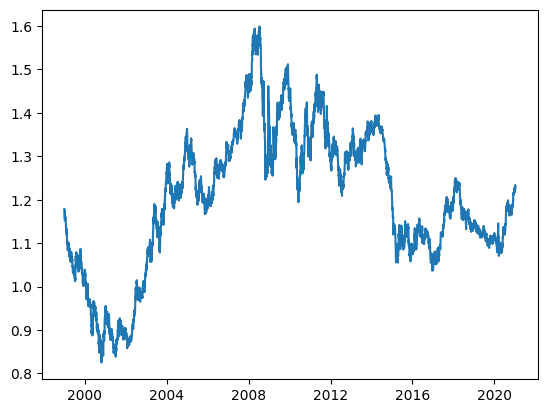

In [10]:
# line plot to viz evolution of €:$ exchange rate

plt.plot(euro_to_dollar['date'], euro_to_dollar['us_dollar'])
plt.show()

In [11]:
# calculate rolling mean to smooth out daily wiggles in plot and focus audience attn to long term changes

us_rolling_mean = euro_to_dollar['us_dollar'].rolling(30).mean()
us_rolling_mean

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
5694    1.211170
5695    1.212530
5696    1.213987
5697    1.215357
5698    1.216557
Name: us_dollar, Length: 5637, dtype: float64

In [12]:
# add col to df

euro_to_dollar['us_rolling_mean'] = us_rolling_mean
euro_to_dollar[-5:]

,date,us_dollar,us_rolling_mean
5694,2021-01-04,1.2296,1.211170
5695,2021-01-05,1.2271,1.212530
5696,2021-01-06,1.2338,1.213987
5697,2021-01-07,1.2276,1.215357
5698,2021-01-08,1.2250,1.216557


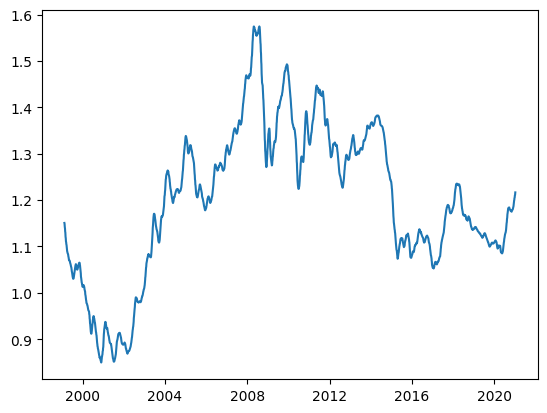

In [13]:
# plot 30-day rolling mean

plt.plot(euro_to_dollar['date'], euro_to_dollar['us_rolling_mean'])
plt.show()

# 4. Coming up with an idea

- Show how the euro-dollar rate has changed during the coronavirus pandemic. We can show the 2020 data and the 2016-2019 data as a baseline. We can use a line plot.

# 5. Sketching a graph

In [14]:
# plt.figure(figsize=(8, 5)) 
# plt.imshow(mpimg.imread("2_3_dataquest-exchange-rates_sketch.png"))
# plt.axis("off")
# plt.show()


# 6. Coding the graph

In [15]:
# segment data pre and covid years
pre_and_covid = euro_to_dollar.copy()[(euro_to_dollar['date'].dt.year>=2019) & (euro_to_dollar['date'].dt.year<=2020)]
pre =   pre_and_covid.copy()[(pre_and_covid['date'].dt.year>=2019) & (pre_and_covid['date'].dt.year<2020)] 
covid = pre_and_covid.copy()[(pre_and_covid['date'].dt.year==2020)]


#### double check

In [16]:
pre.describe()

,date,us_dollar,us_rolling_mean
count,255,255.000000,255.000000
mean,2019-07-01 17:36:00,1.119475,1.121034
min,2019-01-02 00:00:00,1.088900,1.099537
25%,2019-04-01 12:00:00,1.108500,1.107752
50%,2019-07-03 00:00:00,1.119300,1.122193
75%,2019-09-30 12:00:00,1.130100,1.131247
max,2019-12-31 00:00:00,1.153500,1.142103
std,NaN,0.013661,0.012866


In [17]:
covid.describe()

,date,us_dollar,us_rolling_mean
count,257,257.000000,257.000000
mean,2020-07-02 14:17:16.575875584,1.142196,1.136209
min,2020-01-02 00:00:00,1.070700,1.084997
25%,2020-04-01 00:00:00,1.100100,1.100930
50%,2020-07-03 00:00:00,1.133600,1.121130
75%,2020-10-01 00:00:00,1.181400,1.178023
max,2020-12-31 00:00:00,1.228100,1.209623
std,NaN,0.044505,0.039050


#

In [18]:
# add fivethirtyeight style
style.use('fivethirtyeight')

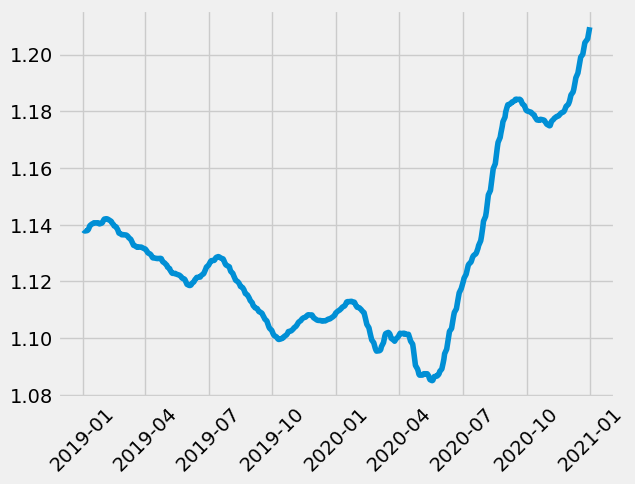

In [21]:
# plot segmented data set
plt.plot(pre_and_covid['date'], pre_and_covid['us_rolling_mean'])
plt.xticks(rotation=45)

plt.show()

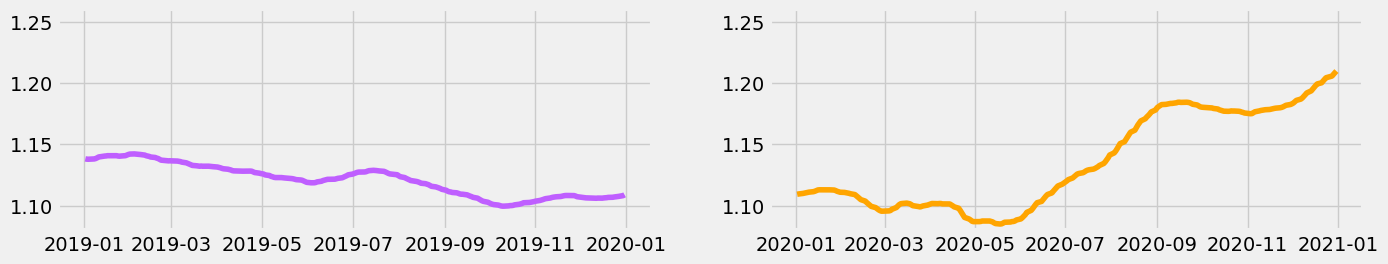

In [24]:
# subplots

plt.figure(figsize=(15,6), dpi=100)
ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)

# limits, ticks, and lables for all subplots
axes = [ax1, ax2]

for ax in axes:
    ax.set_ylim(1.08, 1.26)

ax1.plot(pre['date'], pre['us_rolling_mean'], color='#BF5FFF')
ax2.plot(covid['date'], covid['us_rolling_mean'], color='#ffa500')
plt.show()


In [102]:
ax.get_xticks()

array([13879, 14245])

In [ ]:
# subplots

plt.figure(figsize=(15,8), dpi=100)
ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
# ax4 = plt.subplot(2,1,1)

# limits, ticks, and lables for all subplots
axes = [ax1, ax2, ax3, ax4]
for ax in axes:
    ax.set_ylim(1.08, 1.24)
    ax.set_yticks([1.08, 1.10, 1.12, 1.14, 1.16, 1.18, 1.20, 1.22])
    ax.set_yticklabels(['1.08','1.10', '1.12', '1.14', '1.16', '1.18', '1.20', '1.22'], alpha=0.3)
    ax.grid(alpha=0.5)

# # ax1 = pre-covid

ax1.plot(pre['date'], pre['us_rolling_mean'], color='#BF5FFF')
# ax.set_xticks(13879, 14245)
# ax1.set_xlabel(['01', '03', '05', '07', '09', '11', '01'], alpha=0.3)
# ax1.text(12418, 1.92, 'Pre-Covid', fontsize=18, weight='bold', color='#BF5FFF')
# ax1.text(12180, 1.8, '(2018-2019)', weight='bold', alpha=0.3)

# # ax2 = covid

ax2.plot(covid['date'], covid['us_rolling_mean'], color='#ffa500')
# ax.set_xticks(13879, 14245)
# ax1.set_xlabel(['01', '03', '05', '07', '09', '11', '01'], alpha=0.3)
# ax1.text(15079, 1.92, 'Pre-Covid', fontsize=18, weight='bold', color='#ffa500')
# ax2.text(14899, 1.8, '(2020)', weight='bold', alpha=0.3)

# # # title and subtitle

ax1.text(10757, 2.35, 'EURO-USD rate average ### before the 2020 pandemic',
        fontsize=20, weight='bold')
ax1.text(10757, 2.14, '''EURO-USD exchange during the pandemic''', fontsize=16)

# # add signature
# ax4.text(10757, 0.65, '@slp22' +' '*140 + 'Source: European Central Bank', 
#          color='#f0f0f0', backgroundcolor='#4d4d4d', size=14)
plt.show()

